In [1]:
# Instructions for Breckenridge, CO precipitation data plots

In [2]:
# Set the kernel to "base (Python 3.11.6)"

# Import earthpy and pandas (as pd)
import earthpy 
import pandas as pd

In [3]:
# Configure the API to search for Breckenridge's precipitation data

# Rename the DataFrame to "breckenridge_prcp_df"
# Change station to USC00050909
# Change dataType to PRCP
# Change startDate to 1949-02-01
# Change endDate to 2025-07-31
breckenridge_prcp_df = pd.read_csv(
    'https://www.ncei.noaa.gov/access/services/data/v1'
    '?dataset=daily-summaries'
    '&dataTypes=PRCP'
    '&stations=USC00050909'
    '&startDate=1949-02-01'
    '&endDate=2025-07-31'
    '&units=standard',
    index_col='DATE',
    parse_dates=True,
    na_values=['NaN']
)
breckenridge_prcp_df

,STATION,PRCP
DATE,,
1949-02-01,USC00050909,0.00
1949-02-02,USC00050909,0.00
1949-02-03,USC00050909,0.02
1949-02-04,USC00050909,0.02
1949-02-05,USC00050909,0.04
...,...,...
2025-07-27,USC00050909,0.00
2025-07-28,USC00050909,0.00
2025-07-29,USC00050909,0.00


In [4]:
# Double check the download
breckenridge_prcp_df.head()

,STATION,PRCP
DATE,,
1949-02-01,USC00050909,0.00
1949-02-02,USC00050909,0.00
1949-02-03,USC00050909,0.02
1949-02-04,USC00050909,0.02
1949-02-05,USC00050909,0.04


In [5]:
# Rename "PRCP" to "Precipitation"
breckenridge_prcp_udf = breckenridge_prcp_df.rename(columns={
    'PRCP': 'Precipitation',
})

breckenridge_prcp_udf



,STATION,Precipitation
DATE,,
1949-02-01,USC00050909,0.00
1949-02-02,USC00050909,0.00
1949-02-03,USC00050909,0.02
1949-02-04,USC00050909,0.02
1949-02-05,USC00050909,0.04
...,...,...
2025-07-27,USC00050909,0.00
2025-07-28,USC00050909,0.00
2025-07-29,USC00050909,0.00


In [6]:
# Convert the precipitation units from inches to centimeters
breckenridge_prcp_udf['Precipitation'] = (
    (breckenridge_prcp_udf['Precipitation'] * 2.54))
breckenridge_prcp_udf

,STATION,Precipitation
DATE,,
1949-02-01,USC00050909,0.0000
1949-02-02,USC00050909,0.0000
1949-02-03,USC00050909,0.0508
1949-02-04,USC00050909,0.0508
1949-02-05,USC00050909,0.1016
...,...,...
2025-07-27,USC00050909,0.0000
2025-07-28,USC00050909,0.0000
2025-07-29,USC00050909,0.0000


<Axes: title={'center': 'Daily Precipitation in Breckenridge, CO Between 1949 and 2025'}, xlabel='Precipitation (cm)', ylabel='Frequency (Days)'>

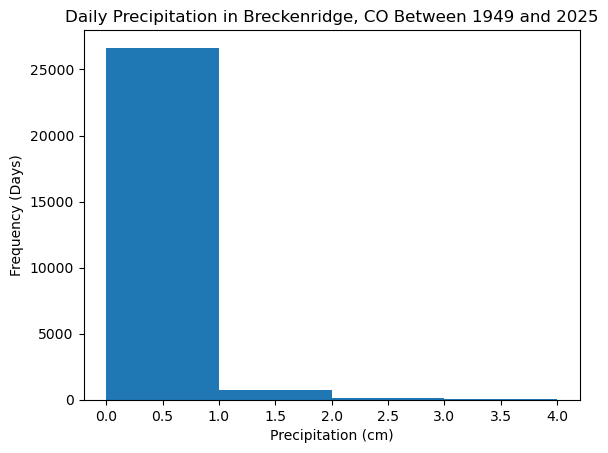

In [7]:
# Plot the daily precipitation frequency in Breckenridge, CO
# Add a title, label the axes, and remove the legend

breckenridge_prcp_udf.plot.hist(
    title='Daily Precipitation in Breckenridge, CO Between 1949 and 2025',
    xlabel='Precipitation (cm)',
    ylabel='Frequency (Days)',
    legend=False,
    bins=[0, 1, 2, 3, 4]
)

In [ ]:
# Resample precipitation data to find annual precipitation sums
# Rename "breckenridge_prcp_udf" to "breckenridge_annual_prcp_df"
breckenridge_annual_prcp_df = (
    breckenridge_prcp_udf
    .resample('YE')
    .sum('DATE')
)
breckenridge_annual_prcp_df

,Precipitation
DATE,
1949-12-31,51.2318
1950-12-31,45.4660
1951-12-31,59.4106
1952-12-31,38.0746
1953-12-31,46.3296
...,...
2021-12-31,54.2290
2022-12-31,68.8340
2023-12-31,54.3306


<Axes: title={'center': 'Annual Precipitation in Breckenridge, CO'}, xlabel='Year', ylabel='Total Precipitation (cm)'>

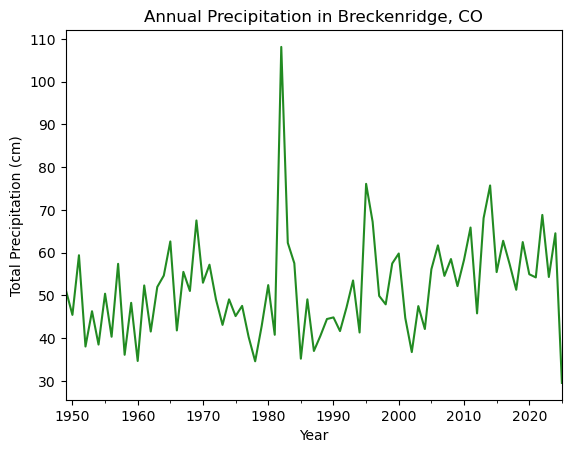

In [9]:
# Create a larger plot showing Breckenridge, CO's annual PRCP
# Add a title, label the axes, and remove the legend
breckenridge_annual_prcp_df.plot(
    title='Annual Precipitation in Breckenridge, CO',
    y='Precipitation',
    xlabel='Year',
    ylabel='Total Precipitation (cm)',
    legend=False,
    color='forestgreen' 
)

In [10]:
# Import the packages hvplot.pandas and holoviews (as hv)
import hvplot.pandas
import holoviews as hv
import numpy 

# Create an interactive plot of Breckenridge's annual precipitation
breckenridge_annual_prcp_plot = breckenridge_annual_prcp_df.hvplot(
    y='Precipitation',
    x='DATE',
    title='Annual Precipitation in Breckenridge, CO',
    ylabel='Precipitation (cm)',
    xlabel='Year',
    legend=False,
    width=1000, height=500)
breckenridge_annual_prcp_plot

:Curve   [DATE]   (Precipitation)

In [11]:
# Save breckenridge_annual_prcp_plot and its html version
hv.save(breckenridge_annual_prcp_plot, 'breckenridge_annual_prcp_plot.html')

In [12]:
# Import matplotlib.pyplot as plt and seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

# Fit an OLS linear regression
from sklearn.linear_model import LinearRegression

In [13]:
# Change the index from date to year and turn it into a column
breckenridge_annual_prcp_df.index.year.values

# Remove NaN values from input y (the precipitation values)
# Rename the DataFrame to "breckenridge_clean_prcp_df"
breckenridge_clean_prcp_df = (
    breckenridge_annual_prcp_df.dropna(subset=['Precipitation'])
)
breckenridge_clean_prcp_df

# Reshape the "Year" column to be a 2D array for scikit-learn
X = breckenridge_clean_prcp_df.index.year.values.reshape(-1, 1)

# Get the temperature values using .values
y = breckenridge_clean_prcp_df['Precipitation'].values
 
# Create and fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Obtain the slope and intercept
slope = model.coef_[0]
intercept = model.intercept_

# Print the slope and intercept
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")

Slope: 0.1433432620011567
Intercept: -233.05291354435033


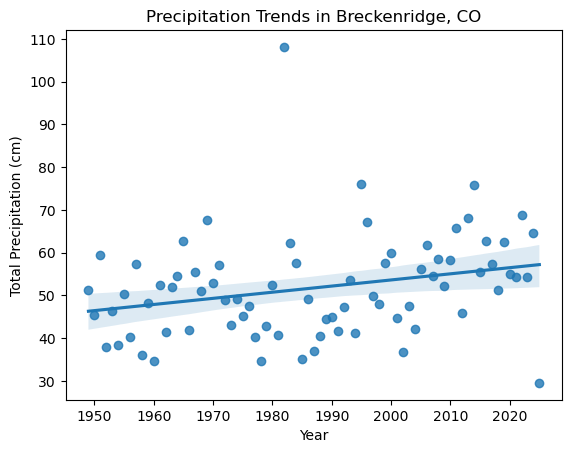

In [14]:
# Plot tne annual average prcp for Breckenridge with a trend line
ax = sns.regplot(
    x=breckenridge_clean_prcp_df.index.year,
    y=breckenridge_clean_prcp_df.Precipitation
)

# Label the title and axes
ax.set(
    title='Precipitation Trends in Breckenridge, CO',
    xlabel='Year',
    ylabel='Total Precipitation (cm)'
)

# Display the plot without extra text
plt.show()

In [15]:
# Save the imported precipitation data
breckenridge_clean_prcp_df.to_csv('breckenridge_precipitation_data')